In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
# load dataset
df = pd.read_csv("marketing_campaign_dataset.csv")
# Show first 5 row
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [9]:
# check the data shape
df.shape

(200000, 16)

In [7]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [8]:
# Summary statistics
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [9]:
# Check for missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

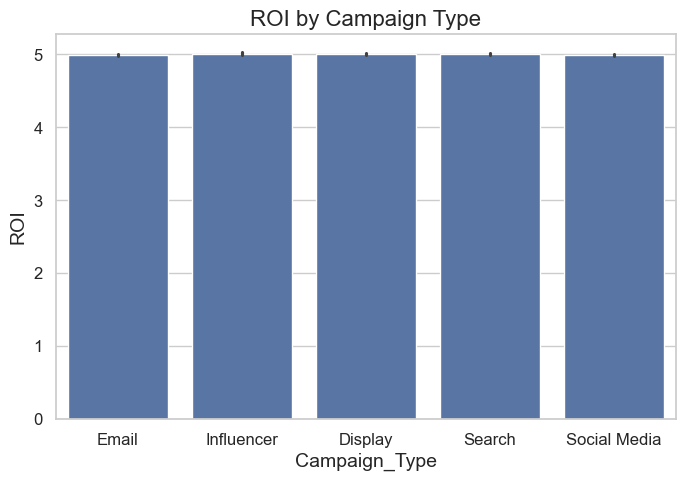

In [90]:
plt.figure(figsize=(8,5))
sns.barplot(x="Campaign_Type", y="ROI",data=df)
plt.title("ROI by Campaign Type")
plt.show()

In [18]:
# Clean acquisition_cost column,remove $ and commas,and then covert to float
for col in ['Acquisition_Cost']:df[col]=df[col].replace('$','',regex=True).astype(float)

In [19]:
df['Successful']=(df['ROI']>0).astype(int)
X = df[['Conversion_Rate','Acquisition_Cost','Engagement_Score','Clicks','Impressions']]
y = df['Successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     40000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



In [37]:
# load dataset
df = pd.read_csv("marketing_campaign_dataset.csv")
# preview the dataset
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


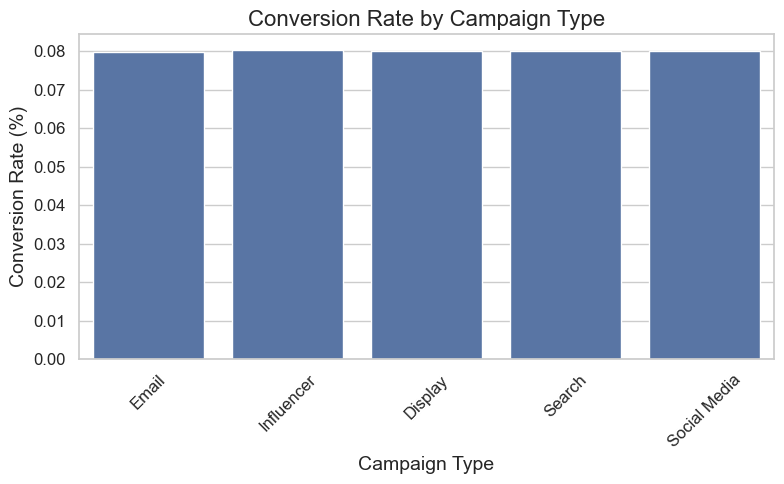

In [97]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Campaign_Type', y='Conversion_Rate',errorbar=None)
plt.title('Conversion Rate by Campaign Type')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Campaign Type')
plt.tight_layout()
plt.show()

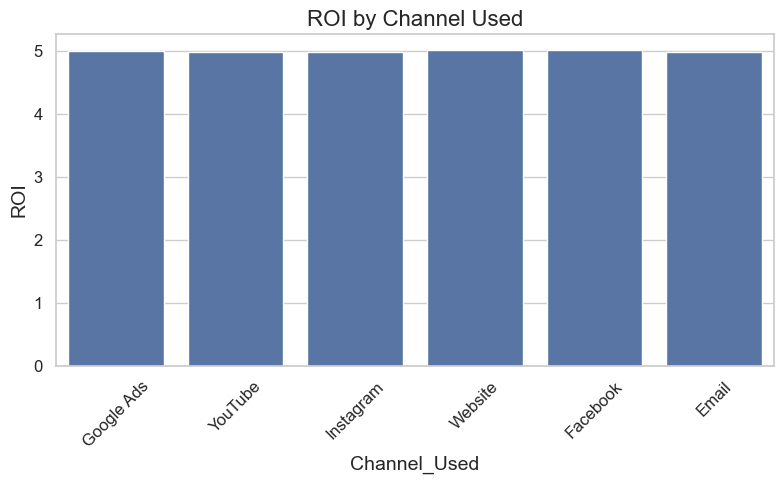

In [100]:
# Boxplot of ROI by channel used
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Channel_Used', y='ROI',errorbar=None)
plt.title('ROI by Channel Used')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

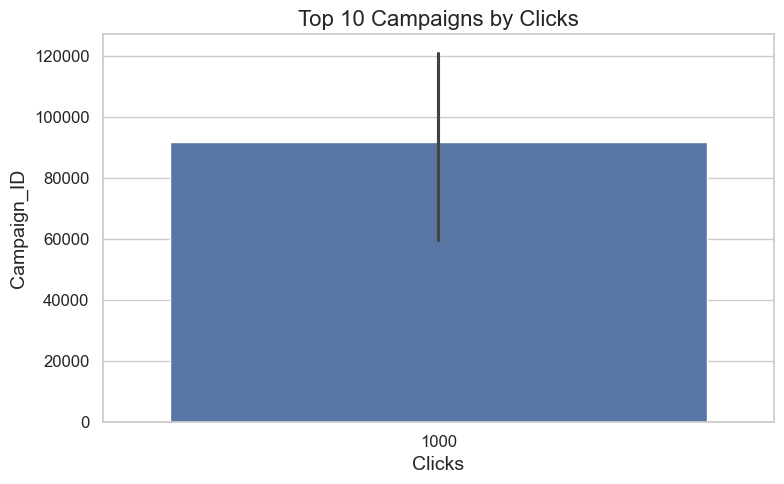

In [103]:
# Boxplot of Top 10 Campaigns by clicks
top_clicks= df.groupby('Campaign_ID')['Clicks'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_clicks.values, y= top_clicks.index)
plt.title('Top 10 Campaigns by Clicks')
plt.xlabel("Clicks")
plt.ylabel('Campaign_ID')
plt.tight_layout()
plt.show()

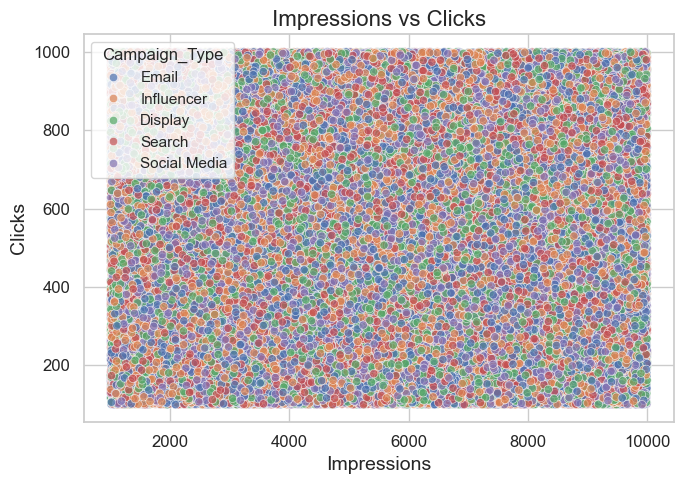

In [104]:
# scatterplot of impression vs clicks
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Impressions', y='Clicks',hue="Campaign_Type",alpha=0.7)
plt.title('Impressions vs Clicks')
plt.tight_layout()
plt.show()

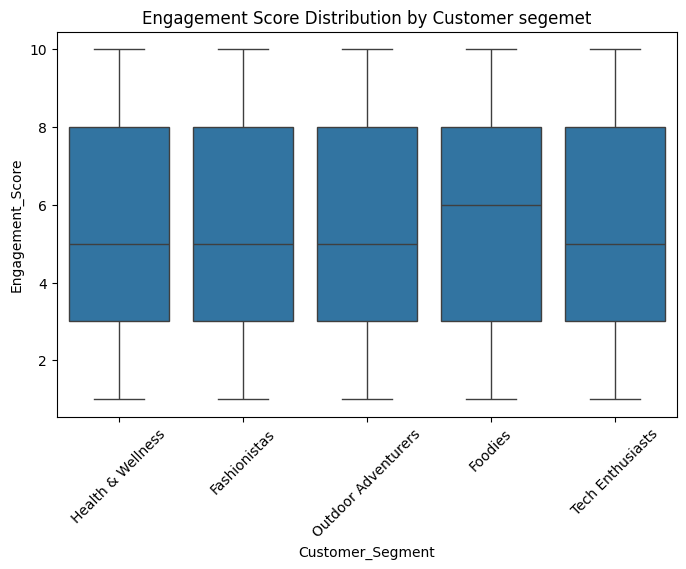

In [6]:
# boxplot of Engagement Score by customer segement
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Customer_Segment', y='Engagement_Score')
plt.title('Engagement Score Distribution by Customer segemet')
plt.xticks(rotation=45)
plt.show()

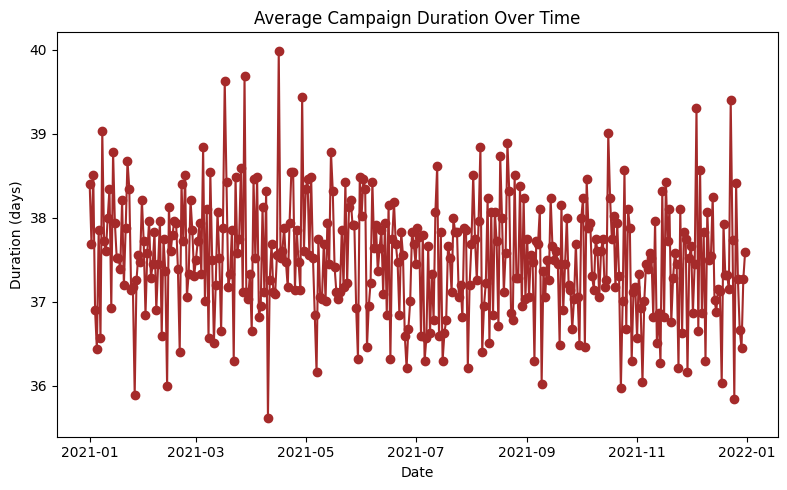

In [11]:
# plot of 
df['Duration']=df['Duration'].astype(str)
df['Date']= pd.to_datetime(df['Date'],errors='coerce')
df['Duration']=df['Duration'].str.extract(r'(\d+)').astype(float)
duration_over_time=df.groupby('Date')['Duration'].mean()

plt.figure(figsize=(8,5))
plt.plot(duration_over_time.index,duration_over_time.values,marker='o',linestyle='-',color='brown')
plt.title('Average Campaign Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Duration (days)')
plt.tight_layout()
plt.show()

In [3]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load your dataset
df = pd.read_csv("marketing_campaign_dataset.csv")

# ------------------- CHART 1: Conversion rate by campaign type -------------------
conv_rate = df.groupby("Campaign_Type")["Conversion_Rate"].mean().reset_index()
fig1=px.bar(conv_rate, x="Campaign_Type", y="Conversion_Rate",
              title="Conversion Rate by Campaign Type")

# ------------------- CHART 2: ROI by channel -------------------
roi = df.groupby("Channel_Used")["ROI"].mean().reset_index()
fig2=px.bar(roi, x="Channel_Used", y="ROI", 
              title="ROI by Marketing Channel")

# ------------------- CHART 3: Top 10 campaigns by clicks -------------------
top10 = df.groupby("Campaign_ID")["Clicks"].sum().nlargest(10).reset_index()
fig3=px.bar(top10, x="Campaign_ID", y="Clicks",
              title="Top 10 Campaigns by Clicks")

# ------------------- CHART 4: Impressions vs Clicks -------------------
fig4=px.scatter(df, x="Impressions", y="Clicks", 
                  color="Channel_Used", 
                  title="Impressions vs Clicks")

# ------------------- CHART 5: Engagement score distribution -------------------
fig5=px.box(df, x="Customer_Segment", y="Engagement_Score", 
              title="Engagement Score by Customer Segment")

# ------------------- CHART 6: Average campaign duration over time -------------------
df['Duration']=df['Duration'].str.replace('days','',regex=False)
df['Duration']=pd.to_numeric(df['Duration'])
duration = df.groupby("Date")["Duration"].mean().reset_index()
import plotly.express as px
fig6=px.line(duration, x="Date", y="Duration", 
               title="Average Campaign Duration Over Time")

# ------------------- BUILD DASHBOARD -------------------
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("📊 Marketing Performance Dashboard", style={'textAlign': 'center'}),

    html.Div([
        dcc.Graph(figure=fig1),
        dcc.Graph(figure=fig2),
    ], style={'display': 'flex'}),

    html.Div([
        dcc.Graph(figure=fig3),
        dcc.Graph(figure=fig4),
    ], style={'display': 'flex'}),

    html.Div([
        dcc.Graph(figure=fig5),
        dcc.Graph(figure=fig6),
    ], style={'display': 'flex'}),
])

if __name__ == '__main__':
    app.run(debug=True)
